In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [25]:
def solve_lorenz(N=10,angle=0.0,max_time=4.0,sigma=10.0,beta=8.0/3,rho=28.0):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1],projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25,25))
    ax.set_ylim((-35,35))
    ax.set_zlim((5,55))

    def lorenz_deriv(x_y_z,t0,sigma=sigma,beta=beta,rho=rho):
        """Compute the time-derivative of a Lorenz system"""
        x,y,z=x_y_z
        return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]
    
    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0=-15+30*np.random.random((N,3))

    # Solve for the trajectories
    t=np.linspace(0,max_time,int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])

    # Choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0,1,N))

    for i in range(N):
        x,y,z = x_t[i,:,:].T
        lines = ax.plot(x,y,z,'-',c=colors[i])
        _ = plt.setp(lines,linewidth=2)
    
    ax.view_init(30,angle)
    _=plt.show()

    return t,x_t

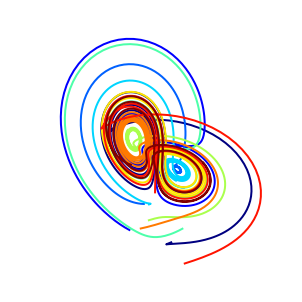

In [26]:
t,x_t=solve_lorenz(angle=0,N=10)

In [28]:
w = interactive(solve_lorenz, angle=(0.,360.),N=(0,50),sigma=(0.0,50.0),rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [29]:
t,x_t=w.result

In [30]:
w.kwargs

{'N': 38,
 'angle': 105.7,
 'max_time': 2.7,
 'sigma': 9.2,
 'beta': 3.93333,
 'rho': 39.4}

In [31]:
xyz_avg = x_t.mean(axis=1)

In [32]:
xyz_avg.shape

(38, 3)

Text(0.5, 1.0, 'Average $x(t)$')

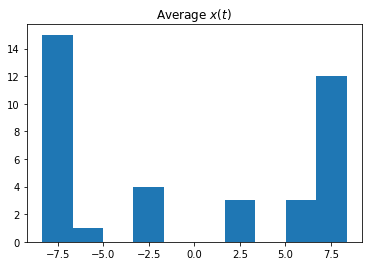

In [33]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$')

Text(0.5, 1.0, 'Average $y(t)$')

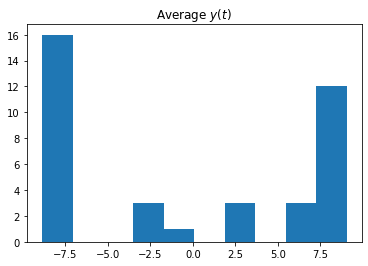

In [34]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')